<a href="https://colab.research.google.com/github/Chanda92/CE888/blob/master/Lab2/Bootstrapping_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/Chanda92/CE888/master/Lab2/customers.csv')
data = df.values.T[1]

In [0]:

# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
  array = np.random.choice(sample, size = (n_iterations, sample_size), replace = True)
  data_mean = np.mean(array)
  mean = []
  for i in array:
    mean.append(np.mean(i))
  CI = 95
  rem = (100 - CI) / 2
  value = np.percentile(mean, q = [rem, CI + rem])
  lower = value[0]
  upper = value[1]
  return data_mean, lower, upper

(0.0, 100000.0)

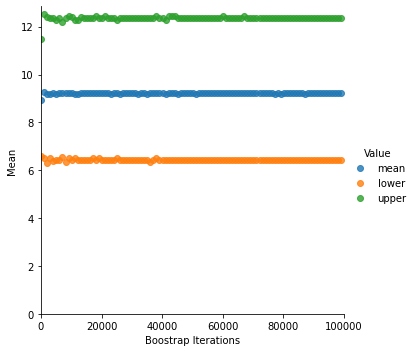

In [8]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns = ['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data = df_boot, fit_reg = False, hue = "Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches = 'tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches = 'tight')


# Lets, modify the bootstrap function, so that you can pass your desired confidence interval as a parameter.


In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
  array = np.random.choice(sample, size = (iterations, sample_size), replace = True)
  data_mean = np.mean(array)
  mean = []
  for i in array:
    mean.append(np.mean(i))
  CI = ci
  rem = (100 - CI) / 2
  value = np.percentile(mean, q = [rem, CI + rem])
  lower = value[0]
  upper = value[1]
  return data_mean, lower, upper


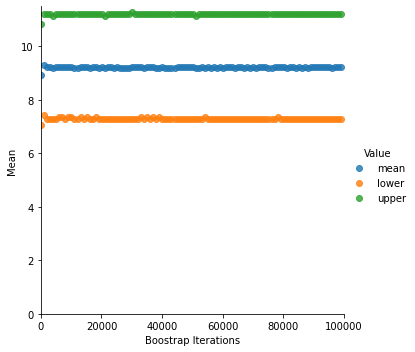

In [10]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns = ['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data = df_boot, fit_reg = False, hue = "Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches = 'tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches = 'tight')


#Vehicles Dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed.

A business is looking at changing their current vehicle fleet and replacing their vehicles with ones used by their competitors. They have captured the MPG of some of the cars in both fleets.

In [11]:
# Read the data for the vehicles from vehicles.csv
data = pd.read_csv('https://raw.githubusercontent.com/Chanda92/CE888/master/Lab2/vehicles.csv')
data

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3d8049160>,
      dtype=object)

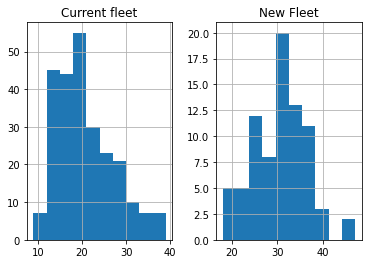

In [12]:
pd.DataFrame.hist(data)

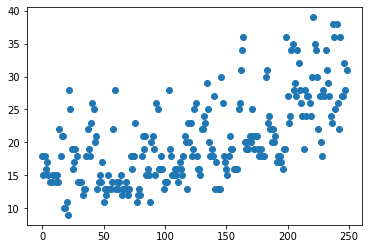

In [13]:
num = len(data['Current fleet'])
x = np.arange(0, num, 1)
y = data.iloc[:, 0]
plt.scatter(x, y)

#Bootstrap on Vehicles

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.

*   Calculate the mean of both samples.
*   Using the bootstrap function
*   Find the upper and lower bound of the mean of the current fleet
*   Do the same with the new fleet.
*   Are they comparable? (i.e., is one better than the other?) -- it can be done with a permutation test.


In [0]:
current = data['Current fleet']
proposed = data['New Fleet'].dropna()

In [0]:
def permutation(current, proposed, iteration):
  main_value = np.subtract(np.mean(proposed), np.mean(current))
  concat = np.concatenate((current, proposed))
  count = 0

  for i in range(iteration):
    permute = np.random.permutation(concat)
    p_current = permute[:len(current)]
    p_proposed = permute[len(current):]

    new_value = np.subtract(np.mean(p_proposed), np.mean(p_current))
    
    if(new_value > main_value):
      count += 1

  p_value = count / iteration
  
  return p_value

In [16]:
old = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])
new = np.array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])
permutation(old, new, 30000)

0.6055666666666667

In [17]:
permutation(current, proposed, 30000)

0.0